# Introduction to Data Science

## Notebook 3 (linear and polynomial regression, gradient method)

### Linear regression

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

We'll use Sklearn's california housing dataset from the 1990 US census. First load the dataset from sklearn, and notice that it is a dictionary like object. 

In [2]:
from sklearn.datasets import fetch_california_housing

cali = fetch_california_housing()
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
cali.data.shape

(20640, 8)

In [4]:
print(cali.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<span style="color:red">What do the rows in this data frame represent?</span>

Let's take a look at the data!

In [6]:
ca = pd.DataFrame(cali.data)
ca.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding column names

In [7]:
ca.columns = cali.feature_names
ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<span style="color:red">Add a feature called "RoomRatio" which is rooms per bedroom in the house.</span>

In [8]:
ca['RoomRatio'] = ca['AveRooms']/ca['AveBedrms']

In [9]:
ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomRatio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,6.821705
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,6.418626
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,7.721053
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,5.421277
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,5.810714


Take a look at the target variable and add it to our data frame!

In [10]:
print(cali.target.shape)

(20640,)


In [11]:
ca['PRICE'] = cali.target

#### Some descriptive statistics - explanatory data analysis

In [12]:
ca.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomRatio,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,4.984262,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.171836,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.000000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,4.169542,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,4.921728,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,5.700424,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,10.000000,5.000010


##### Scatter plots

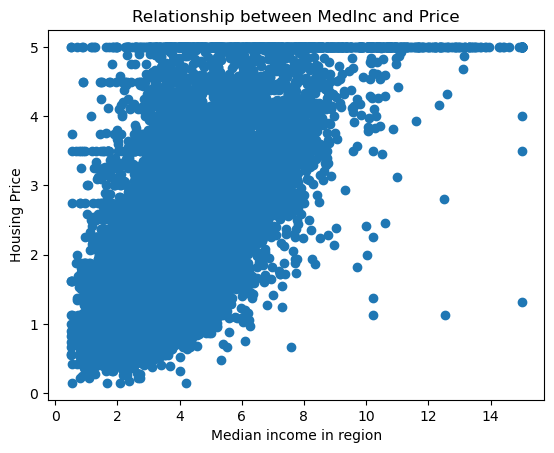

In [13]:
plt.scatter(ca.MedInc, ca.PRICE)
plt.xlabel("Median income in region")
plt.ylabel("Housing Price")
plt.title("Relationship between MedInc and Price")
plt.show()

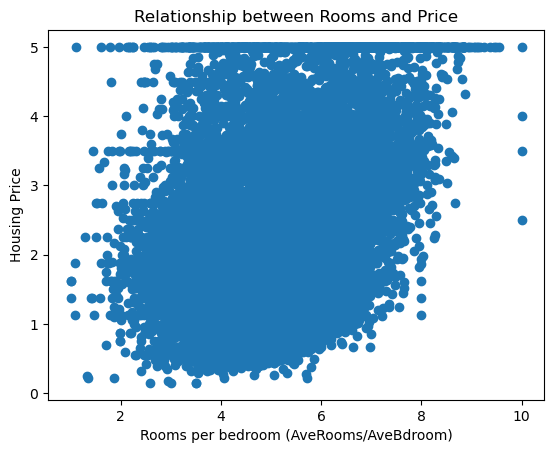

In [14]:
plt.scatter(ca.RoomRatio, ca.PRICE)
plt.xlabel("Rooms per bedroom (AveRooms/AveBdroom)")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")
plt.show()

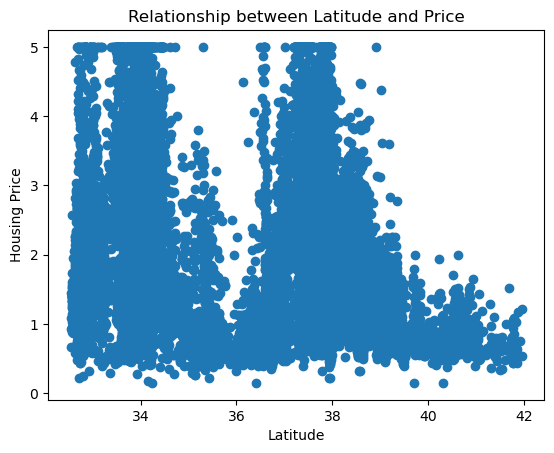

In [15]:
plt.scatter(ca.Latitude, ca.PRICE)
plt.xlabel("Latitude")
plt.ylabel("Housing Price")
plt.title("Relationship between Latitude and Price")
plt.show()

##### Histograms

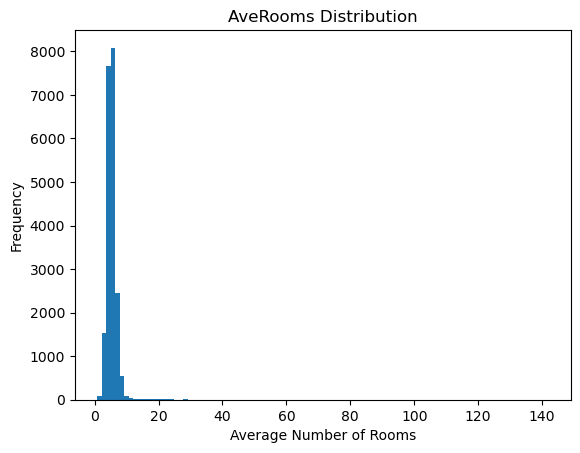

In [16]:
plt.hist(ca.AveRooms,bins=100)
plt.title("AveRooms Distribution")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Frequency")
plt.show()

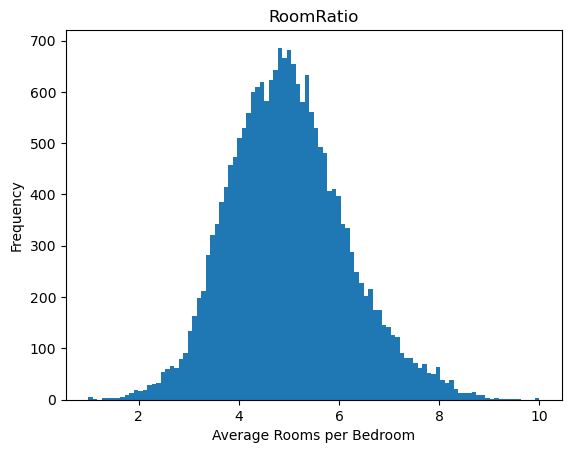

In [17]:
plt.hist(ca.RoomRatio,bins=100)
plt.title("RoomRatio")
plt.xlabel("Average Rooms per Bedroom")
plt.ylabel("Frequency")
plt.show()

<span style="color:red">Why is Averooms's distribution skewed, but Roomratio's not?</span>
This dataset contains some hotels and that skews the average rooms dataset.
This shows why it is useful to normalise or transform our variables. Some variables are more representative than others.

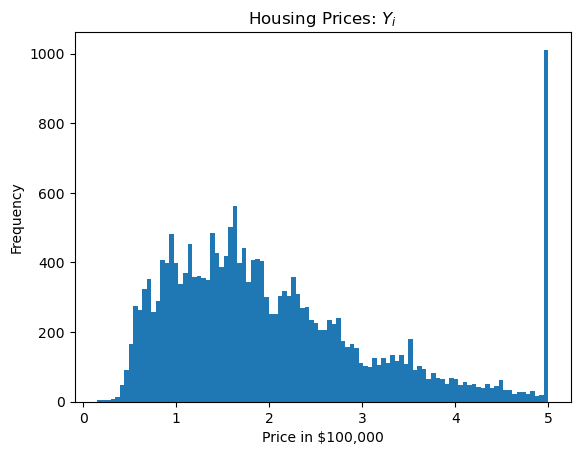

In [18]:
plt.hist(ca.PRICE,bins=100)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price in $100,000')
plt.ylabel('Frequency')
plt.show()

<span style="color:red">What do you notice about the housing price distribution?</span>
The hotels (and some villas) are responsible for that high ass bin at the end. Another possibility is that they price-capped the data. So maybe that is not 500_000 but 500_000 and more.

#### Fitting linear regression

In [19]:
from sklearn.linear_model import LinearRegression

X = ca.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm


LinearRegression()

### What can we do with a LinearRegression object? 
 
Y = mx + b

 $\hat{Y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_n \cdot x_n$ 

In [20]:
# Use all features to fit linear regression model
lm.fit(X, ca.PRICE)

LinearRegression()

In [21]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -34.27680088156907


<span style="color:red">How many coefficients do you expect the model to have?</span>

In [22]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 9


In [23]:
lm.coef_

array([ 4.74203674e-01,  9.30606929e-03,  1.08618093e-01, -3.59542066e-01,
       -7.56199217e-06, -3.99119544e-03, -4.00516314e-01, -4.16902443e-01,
       -3.02303578e-01])

In [24]:

'''
these coefficients are w0, w1, ..., wn. they are interesting in understanding how the variables (x0, ..., xn) affect the
prediction (y). we can see which variables increase the house price, and which reduce it and by how much.
maybe we are not even trying to predict the house price, but to understand how each factor influences the price. 
regression is still very nice for this.
'''

# The coefficients
pd.DataFrame({'featues':X.columns, 'estimatedCoefficients':lm.coef_})


,featues,estimatedCoefficients
0,MedInc,0.474204
1,HouseAge,0.009306
2,AveRooms,0.108618
3,AveBedrms,-0.359542
4,Population,-0.000008
5,AveOccup,-0.003991
6,Latitude,-0.400516
7,Longitude,-0.416902
8,RoomRatio,-0.302304


In [25]:
# first five predicted prices
lm.predict(X)[0:5]

array([4.15465528, 4.00664182, 3.61646798, 3.28267399, 2.3618279 ])

In [26]:
# actual prices for these records
ca['PRICE'][0:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

<span style="color:red;font-size:20px"> How can we tell if our model fits the data well?</span>

Text(0, 0.5, 'Frequency')

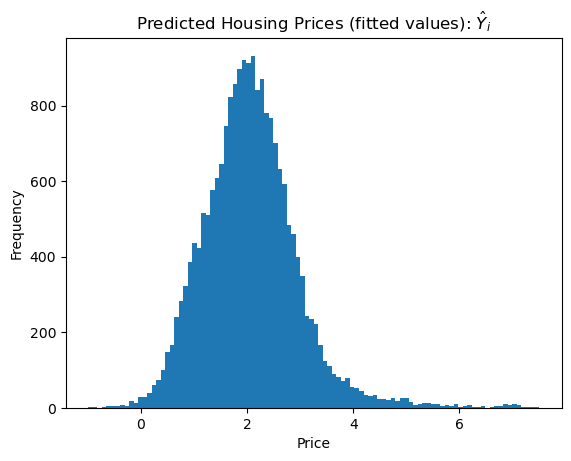

In [27]:
plt.hist(lm.predict(X),bins=100)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

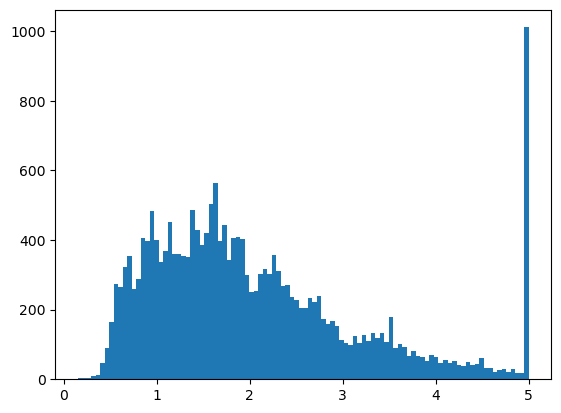

In [28]:
plt.hist(ca['PRICE'],bins=100)
plt.show()

##### Predicted and actual values

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

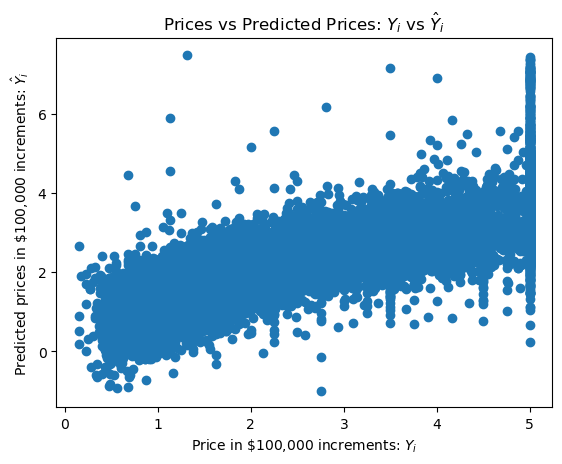

In [29]:
# we would have wanted x = y nice diagonal, but we see that it is underpredicting
plt.scatter(ca.PRICE, lm.predict(X))
plt.xlabel("Price in \$100,000 increments: $Y_i$")
plt.ylabel("Predicted prices in \$100,000 increments: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

##### Sum Squared Error (SSE), Mean Squared Error (MSE), R squared (coefficient of determination)
It is not as straight forward to interpret linear regression models (no ROC curve). If possible, we can compare our RSS and MSE results to a state of the art model. We can also compare them to a baseline model.
because on its won, an MSE is not a very useful metric. It is just a number. We need another mse to compare it to

In [30]:
sse = np.sum((ca.PRICE - lm.predict(X)) ** 2)
sse

10619.873849003994

In [31]:
mse = np.mean((ca.PRICE - lm.predict(X)) ** 2)
mse

0.5145287717540695

What are good values?

In [32]:
ss = np.sum((ca.PRICE - np.mean(ca.PRICE)) ** 2) # our model performs better than just predicting the mean
ss

27483.19819368851

In [33]:
from sklearn.metrics import r2_score # = 1 - sse/ss

r2_score(ca['PRICE'], lm.predict(X)) # ~ 0.61 of the variance is explained by the linear model ~

0.613586680336103

#### Using only one explanatory variable

In [34]:
lm = LinearRegression()
lm.fit(X[['MedInc']], ca.PRICE)

LinearRegression()

In [35]:
mse_MedInc = np.mean((ca.PRICE - lm.predict(X[['MedInc']])) ** 2)
mse_MedInc

0.7011311502929526

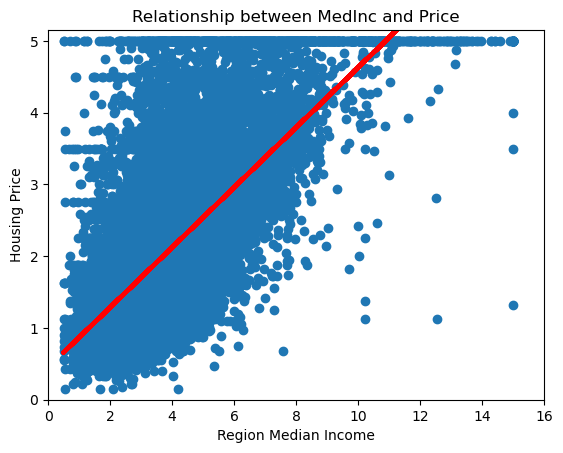

In [36]:
# This is what the line (the regression model for medianInc) looks like

plt.scatter(ca.MedInc, ca.PRICE)
plt.xlabel("Region Median Income")
plt.ylabel("Housing Price")
plt.title("Relationship between MedInc and Price")

plt.plot(ca.MedInc, lm.predict(X[['MedInc']]), color='red', linewidth=3)
plt.axis( [0, 16, 0, 5.15] )
plt.show()

#### Training and test set
Why use a linear model? Sometimes the purpose is to see how well a linear model fits the data. The coefficients may tell us something about our features, e.g. whether there's a positive or negative relationship. Other times we build the model for prediction, in which case we'll use train-test split as we did in classification models.

<span style="color:red;font-size:20px"> When training a linear regression model, what are the values that have to be learned?</span>

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, ca.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13828, 9)
(6812, 9)
(13828,)
(6812,)


In [38]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

##### Calculating the error

In [39]:
# we are not nate silver. we usually expect the error on the training set to be lower

print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.5096502531196372
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.5251513666367157


### Gradient method on a small example

#### What is a linear regression model? Think: Y = mx + b

 $\hat{Y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_n \cdot x_n$ 
 
 $Y = \hat{Y} + e$
 
 $Y = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_n \cdot x_n + e$ 
 
This can also be written as $\hat{y}$ = w<sup>T</sup>x, where w is a vector of weights (or coefficients) and x is a nXd matrix of features. There are n records in the dataset and d features.

<img src="linear_regression.gif" width=250 height=250 />

#### Gradient Descent 

1. randomly initialize $w$ values
2. calculate $\hat{y}$
3. calculate error
4. update $w$ values
5. repeat steps 2-4

#### Let's try it on a toy data set:
The area of some flat ($m^2$) and their prices (million HUF):

In [40]:
size = [26, 33, 49, 53, 120, 150]
price = [9.8, 7.3, 14, 15, 45, 40]

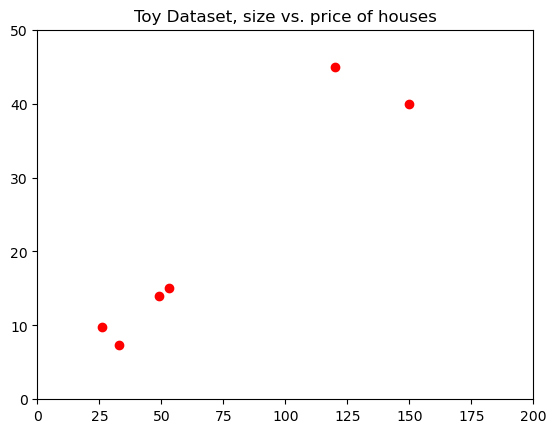

In [41]:
plt.plot(size, price, 'ro')
plt.axis( [0, 200, 0, 50] )
plt.title("Toy Dataset, size vs. price of houses")
plt.show()

#### Fitting a linear model

First we define a function that calculates the sum of squared errors for the given $\hat{Y} = w_1 \cdot x_1$ model. We assume that the data is given so the error only depends on $w$. 

$\epsilon = \sum{ (\hat{Y_i} - Y_i)^2 } $

In [60]:
# define the error function as the sum of squared error
def err(w):
    return np.sum(np.power(np.add(np.multiply(w,size), np.multiply(-1, price)),2))

We consider some simple linear models then we calculate their errors

price = w * size

* Model 1 (blue): price = 0.3 * size
* Model 2 (green): price = 0.4 * size
* Model 3 (red): price = 0.5 * size

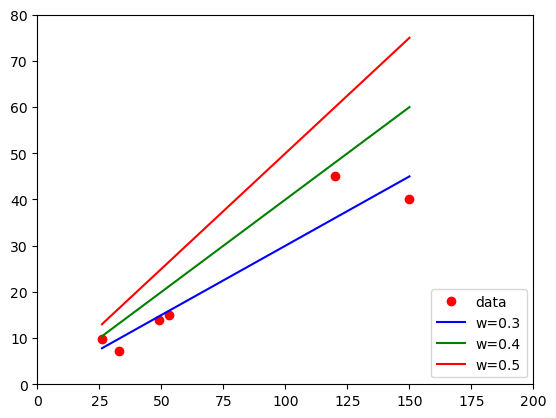

In [43]:
plt.plot(size, price, 'ro')
plt.plot(size, np.multiply(0.3,size), 'b-')
plt.plot(size, np.multiply(0.4,size), 'g-')
plt.plot(size, np.multiply(0.5,size), 'r-')
plt.legend(["data","w=0.3","w=0.4","w=0.5"], loc="lower right")
plt.axis( [0, 200, 0, 80] )
plt.show()

 <div style='color:red'> Which model performs the best? </div>

In [44]:
err(0.3)

118.06

In [45]:
err(0.4)

513.97

In [46]:
err(0.5)

1787.38

Let's plot the sum of squared errors against $w$!

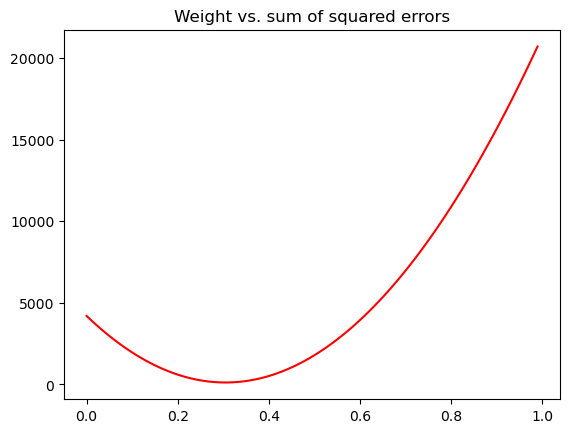

In [47]:
'''
Just by looking at the graph and remembering our goal is to minimise the error
We can see the optimal w0 is between 0.2 amd 0.4
We can only visualise it so nicely because we have one weight
'''

weights = np.multiply(range(100), 0.01)
errors  = []

for w in weights:
    errors.append(err(w))
    
plt.plot(weights, errors, 'r-')
plt.title("Weight vs. sum of squared errors")
plt.show()

We are looking for the w with smallest error. We'll apply the gradient method to find this:
- $epsilon$ is the learning rate. <span style="color:red">What happens when we change the learning rate?</span>
- $w$ is the coefficient; we randomly assign an initial value for w; w is updated in each iteration
- $e$ is the error (predicted label - actual label), in this case sum squared error

In [61]:
'''
this is like the thing we did in class, and eps was lambda
gradient descent
optimal w is now, 
'''

eps = 1e-7 # adjust this
w   = 0.9      
e   = []       
for iteration in range(10000):
    w = w - eps * ( 2*np.sum( np.multiply(np.multiply(size,size),w)) - 2*np.sum(np.multiply(size,price)) )
    e.append(err(w))

In [49]:
w

0.3048820512820544

<span style="color:red;font-size:20px">How the error changes with number of iterations?</span>

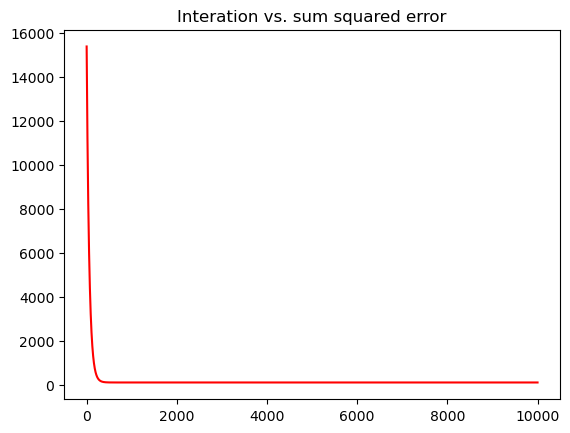

In [50]:
'''
when to stop gradient descent. when the error stops changing.
as we see here, iterations stop changing the error.
the graph here shows us it is somewhere less than 500 iterations with a learning rate of eps = 1e-7
if we in/decrease epsilon, the graph changes
'''

plt.plot(range(10000), e, 'r-')
plt.title("Interation vs. sum squared error")
plt.show()

#### Visualizing the model

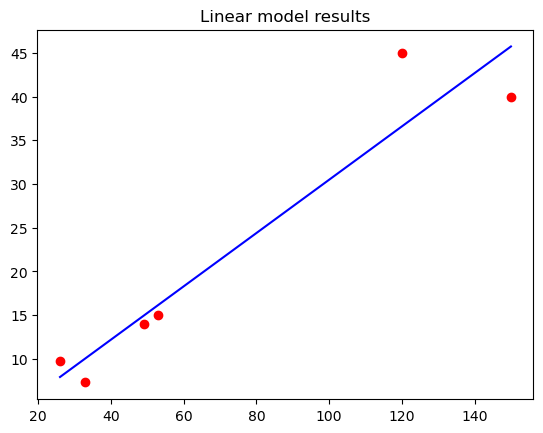

In [51]:
'''
this is the optimal line that was fitted on our data. 
'''

plt.plot(size, price, 'ro')
plt.plot(size, np.multiply(w,size), 'b-')
plt.title("Linear model results")
plt.show()

#### Polynomial regression

As an example we will fit a polynomial of degree 6, namely we will fit the following model:

 $\hat{Y} = w_0 + w_1 \cdot x + w_2 \cdot x^2 + \dots + w_6 \cdot x^6$
 
We normalize the data. We create a data frame that contains the polynomial attrributes. <span style="color:red">Why do we need a column of 1s?</span>

In polynomial regression, this is not hyperdimensional. The x variable remains the same. but we use different transformations of it. 

In [52]:
import math

size1 = np.multiply(np.add(size,-np.mean(size)), 1/math.sqrt(np.var(size)) )

size2 = np.multiply(size1,size1)
size3 = np.multiply(size2,size1)
size4 = np.multiply(size3,size1)
size5 = np.multiply(size4,size1)
size6 = np.multiply(size5,size1)

data = np.column_stack( (np.ones(6), size1, size2, size3, size4, size5, size6) )

In [53]:
def err(w):
    e0 = np.dot(data,w)-price
    return sum(np.multiply(e0, e0))

In [54]:
'''
here, we have two nested loops. that is, for each step, we update all the weights.

'''

eps = 1e-5
w = [0,0,0,0,0,0,0]
e = []

for iteration in range(100000):
    grad=[]
    for k in range(len(w)):
        grad.append(np.sum(np.multiply((np.dot(data,w)-price),data[:,k])))
    for k in range(len(w)):
        w[k] = w[k] - eps * grad[k]
        
    if iteration % 1000 == 0:  #Just to see what happens and to be able to plot the SSE as function of the iterations
        e0 = err(w)
        e.append(e0)
        print(str(e0))

4164.098764310749
2062.8442686265234
1871.46322192925
1702.293912999091
1552.1316869467626
1418.3086751254334
1298.5966834524784
1191.1283357886914
1094.3328948613905
1006.883987778075
927.656990092469
855.6942489544484
790.1766712256043
730.4004820518351
675.7581857818861
625.7229444453185
579.8357374618887
537.6947864887885
498.94682669847094
463.27988466943816
430.4172869869245
400.11267544088537
372.1458466823009
346.31926822334543
322.45515025429785
300.39297512417215
279.98740448335354
261.1064988175226
243.63019606171645
227.44900569763493
212.46288263160525
198.58025156989433
185.71715783119302
173.79652478935873
162.74750160579703
152.50488773865817
143.00862302530192
134.20333402279638
126.03792883728983
118.46523394099046
111.44166751703737
104.92694472976817
98.88381102493344
93.2778001489403
88.07701406070488
83.2519223123882
78.77517881107092
74.62145415425023
70.76728196783058
67.19091787393593
63.87220988395049
60.792479154981606
57.934410169760184
55.28194950444939
52.

#####  Visualizing the model

In [55]:
# for any (normalized) house size, what price would this model predict?

x = np.add(np.multiply(range(400),0.01),-2)

In [56]:
def predict(size):
    return np.dot(w, (1,size,size**2,size**3,size**4,size**5,size**6))

In [57]:
predictions = []
for i in x:
    predictions = predictions + [predict(i)]

predict_data = []
for i in size1:
    predict_data = predict_data + [predict(i)]

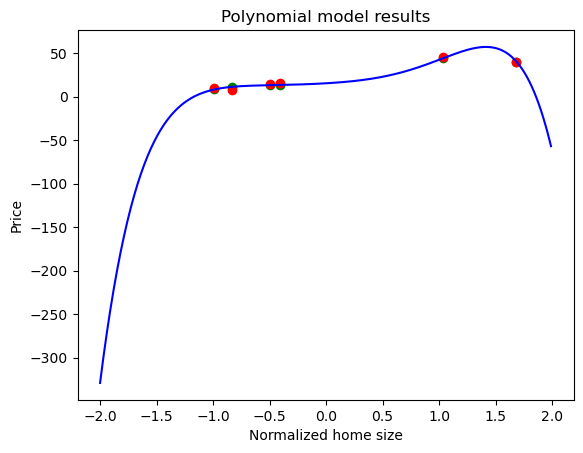

In [58]:
plt.plot(size1,predict_data,'go')
plt.plot(size1,price,'ro') # size1 is the normalized data
plt.plot(x,predictions,'b-')
plt.title("Polynomial model results")
plt.xlabel("Normalized home size")
plt.ylabel("Price")
plt.show()

How the error changes with the number of iterations? (One unit corresponds to 1000 iterations on the $x$ axis.)

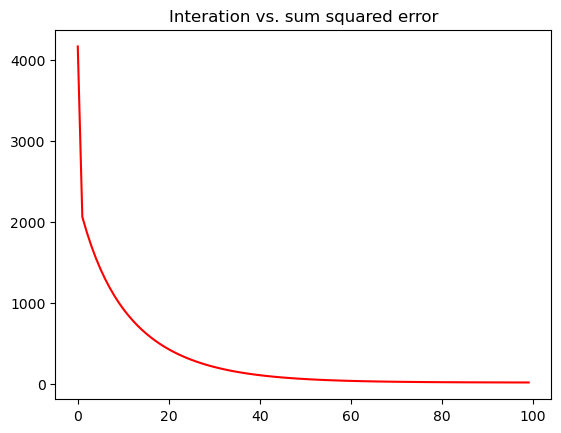

In [59]:
plt.plot(range(100), e, 'r-')
plt.title("Interation vs. sum squared error")
plt.show()